In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

sns.set(style="darkgrid")

In [ ]:
df = pd.read_csv("churn_prediction.xlsx - Sheet1.csv")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,230
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.shape

(5630, 20)

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [ ]:
df.duplicated().any()

np.False_

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
list_obj= df.loc[:, df.dtypes == object].columns.tolist()
for j in list_obj:
  print(f"Unique value of {j}: {df[j].unique()}")

Unique value of preferredlogindevice: ['Mobile Phone' 'Computer' 'Phone']
Unique value of preferredpaymentmode: ['E wallet' 'Cash on Delivery' 'Debit Card' 'UPI' 'Credit Card' 'COD' 'CC']
Unique value of gender: ['Female' 'Male']
Unique value of preferedordercat: ['Fashion' 'Laptop & Accessory' 'Mobile Phone' 'Grocery' 'Mobile' 'Others']
Unique value of maritalstatus: ['Married' 'Single' 'Divorced']


In [ ]:
df['preferredlogindevice']=df['preferredlogindevice'].replace('Mobile Phone','Phone')
df['preferredpaymentmode']=df['preferredpaymentmode'].replace('COD','Cash on Delivery')
df['preferredpaymentmode']=df['preferredpaymentmode'].replace('CC','Credit Card')
df['preferedordercat']= df['preferedordercat'].replace('Mobile Phone','Phone')

In [ ]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
  df[col].fillna(df[col].median(),inplace = True)
df.isnull().sum()

/tmp/ipython-input-1175539230.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace = True)


,0
customerid,0
churn,0
tenure,0
preferredlogindevice,0
citytier,0
warehousetohome,0
preferredpaymentmode,0
gender,0
hourspendonapp,0
numberofdeviceregistered,0


# Q1

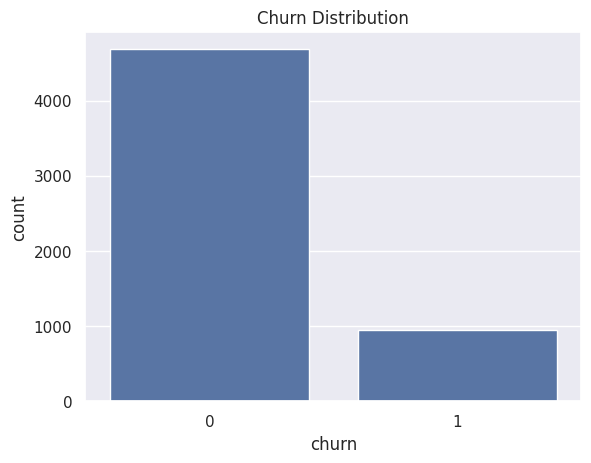

,proportion
churn,
0,83.161634
1,16.838366


In [ ]:
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()

df["churn"].value_counts(normalize=True) * 100


In [ ]:
cat_cols = df.loc[:, df.dtypes == object].columns.tolist()

df_encoded = pd.get_dummies(df,columns=cat_cols,drop_first=True)
df_encoded.head()

,customerid,churn,tenure,citytier,warehousetohome,hourspendonapp,numberofdeviceregistered,satisfactionscore,numberofaddress,complain,...,preferredpaymentmode_E wallet,preferredpaymentmode_UPI,gender_Male,preferedordercat_Grocery,preferedordercat_Laptop & Accessory,preferedordercat_Mobile,preferedordercat_Others,preferedordercat_Phone,maritalstatus_Married,maritalstatus_Single
0,52869,0,20.0,3,7.0,4.0,4,5,3,0,...,True,False,False,False,False,False,False,False,True,False
1,52942,0,13.0,1,9.0,4.0,4,3,2,0,...,False,False,False,False,False,False,False,False,False,True
2,52972,0,16.0,3,7.0,3.0,4,3,3,0,...,False,False,True,False,True,False,False,False,False,False
3,53125,0,5.0,1,16.0,3.0,4,4,3,0,...,False,False,True,False,False,False,False,False,True,False
4,53367,0,9.0,1,28.0,3.0,4,2,3,1,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
x = df_encoded.drop(['churn'], axis=1)
y = df_encoded['churn']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
clf_rand = RandomForestClassifier()
clf_rand.fit(x_train, y_train)
y_pred= clf_rand.predict(x_test)
print(f'Balance accuracy:{balanced_accuracy_score(y_test, y_pred)}')

Balance accuracy:0.9030476833108412


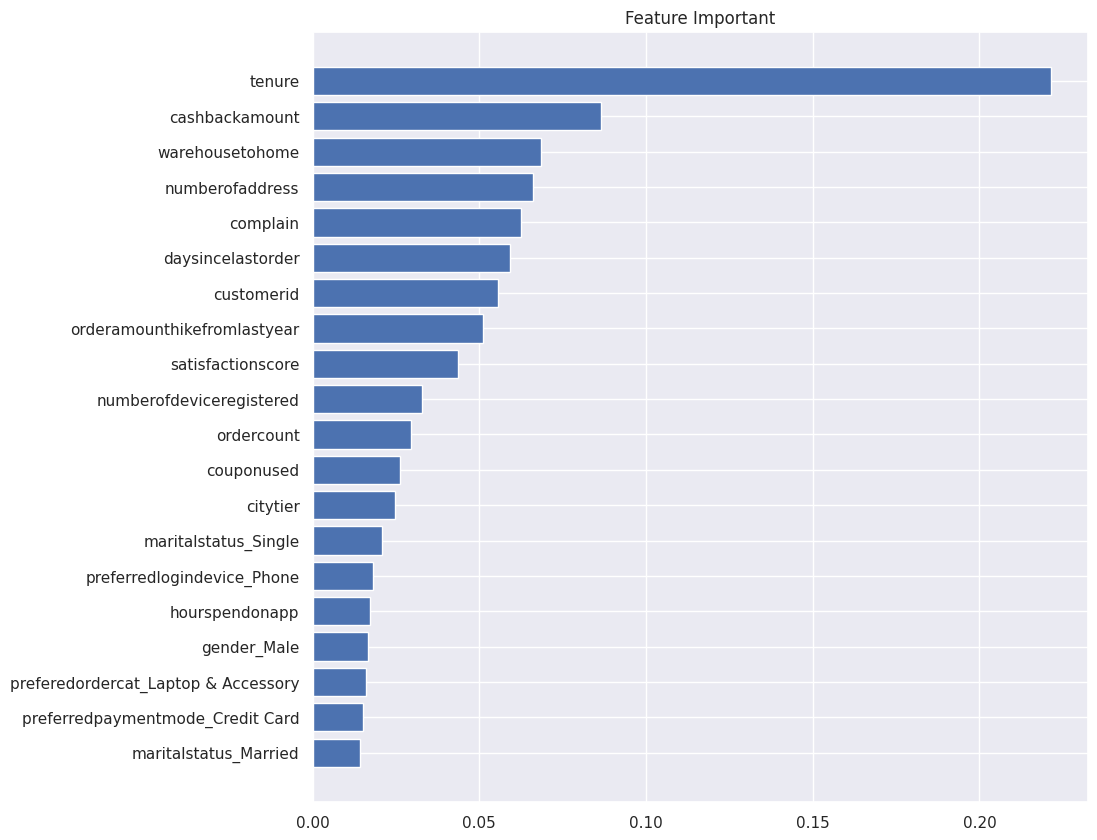

In [ ]:
feats = {}
for feature, importance in zip(x.columns, clf_rand.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()


plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')


plt.show()

Top 5 features influenced to churn: tenure, cashbackamount, warehousetohome, numberofaddress, daysincelastorder

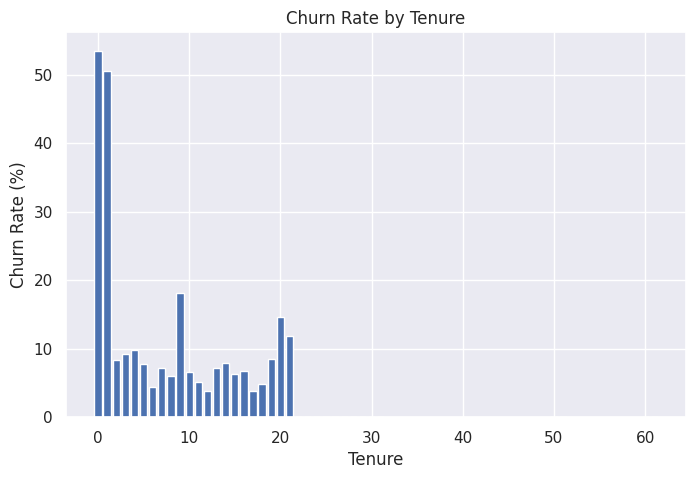

In [ ]:
tenure_churn = (df.groupby('tenure')['churn'].mean().reset_index())
tenure_churn['ChurnRate'] = tenure_churn['churn'] * 100

plt.figure(figsize=(8,5))
plt.bar(
    tenure_churn['tenure'],
    tenure_churn['ChurnRate'])

plt.xlabel("Tenure")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Tenure")
plt.grid(True)
plt.show()

In [ ]:
df['CashbackBin'] = pd.qcut(df['cashbackamount'],q=10,duplicates="drop")
cashback_churn = (df.groupby('CashbackBin')['churn'].mean().reset_index())
cashback_churn['ChurnRate'] = cashback_churn['churn'] * 100

/tmp/ipython-input-3474834322.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cashback_churn = (df.groupby('CashbackBin')['churn'].mean().reset_index())


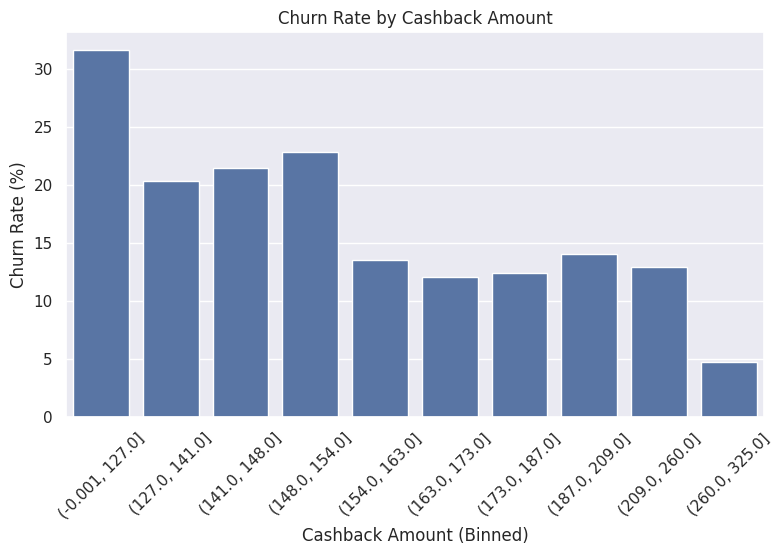

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(x="CashbackBin",y="ChurnRate",data=cashback_churn)
plt.xticks(rotation=45)
plt.xlabel("Cashback Amount (Binned)")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Cashback Amount")
plt.show()

In [ ]:
df["WarehouseDistanceBin"] = pd.cut(df['warehousetohome'],bins=[0,5,10,20,30,50,100],include_lowest=True)
warehouse_churn = (df.groupby('warehousetohome')['churn'].mean().reset_index())
warehouse_churn["ChurnRate"] = warehouse_churn['churn'] * 100

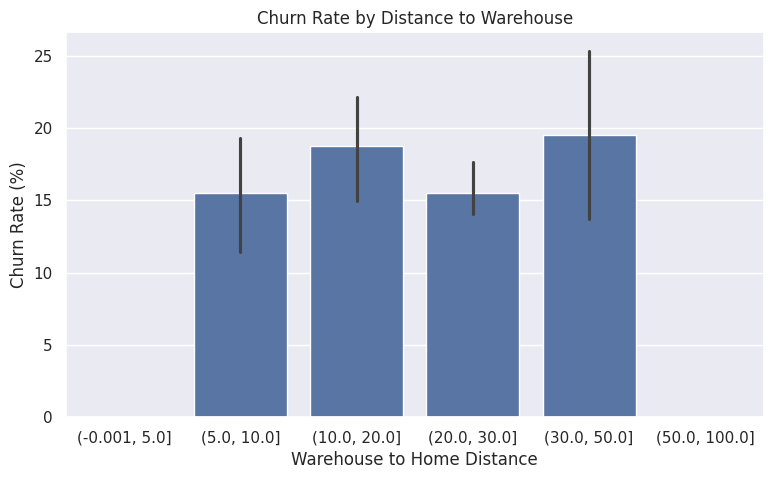

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(x=df["WarehouseDistanceBin"],y="ChurnRate",data=warehouse_churn)
plt.xlabel("Warehouse to Home Distance")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Distance to Warehouse")
plt.show()

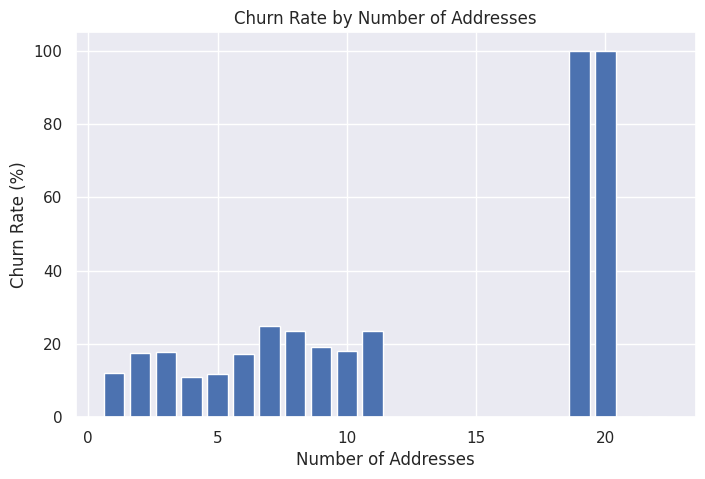

In [ ]:
address_churn = (df.groupby('numberofaddress')['churn'].mean().reset_index())
address_churn["ChurnRate"] = address_churn['churn'] * 100

plt.figure(figsize=(8,5))
plt.bar(address_churn['numberofaddress'],address_churn["ChurnRate"])
plt.xlabel("Number of Addresses")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Number of Addresses")
plt.show()

In [ ]:
address_churn

,numberofaddress,churn,ChurnRate
0,1,0.121294,12.129380
1,2,0.176041,17.604091
2,3,0.178404,17.840376
3,4,0.110544,11.054422
4,5,0.117338,11.733800
5,6,0.172775,17.277487
6,7,0.250000,25.000000
7,8,0.235714,23.571429
8,9,0.192469,19.246862
9,10,0.180412,18.041237


In [ ]:
df["LastOrderBin"] = pd.cut(
    df['daysincelastorder'],
    bins=[0,7,14,30,60,90,180,365],
    include_lowest=True)
last_order_churn = (df.groupby("LastOrderBin")['churn'].mean().reset_index())

last_order_churn['ChurnRate'] = last_order_churn['churn'] * 100

/tmp/ipython-input-2448203753.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  last_order_churn = (df.groupby("LastOrderBin")['churn'].mean().reset_index())


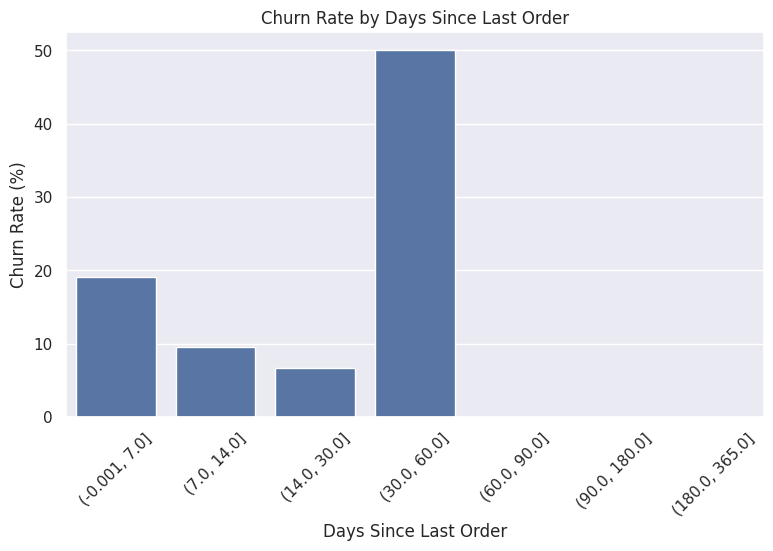

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(x="LastOrderBin",y="ChurnRate",data=last_order_churn)
plt.xticks(rotation=45)
plt.xlabel("Days Since Last Order")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Days Since Last Order")
plt.show()

* Churn tập trung mạnh ở Tenure thấp do KH mới chưa hình thành thói quen mua hàng
* KH churn nhận cashback ít hơn, ở xa kho hơn, ít tình huống sử dụng dịch vụ (do ít địa chỉ)
* Rõ thấy nhất là lần cuối đặt hàng xa nhất

Điều này cho thấy các chiến lược giảm churn cần tập trung vào can thiệp sớm, cá nhân hóa ưu đãi và cải thiện trải nghiệm hậu cần thay vì chỉ dựa vào các yếu tố liên quan đến demographic

#Q2

In [ ]:
#baseline
from sklearn.metrics import accuracy_score

x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(x_train, y_train)

y_pred_baseline = baseline_model.predict(x_test)

baseline_acc = accuracy_score(y_test, y_pred_baseline)
print("Baseline Accuracy:", baseline_acc)
print(classification_report(y_test, y_pred_baseline))


Baseline Accuracy: 0.8907637655417406
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       936
           1       0.79      0.48      0.60       190

    accuracy                           0.89      1126
   macro avg       0.84      0.73      0.77      1126
weighted avg       0.88      0.89      0.88      1126



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 89.07% - Run time 8s

In [ ]:
#Improved model #1 - Random Forest

rf_model = RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_split=10,min_samples_leaf=5,random_state=42,class_weight="balanced")
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9156305506216696
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       936
           1       0.72      0.82      0.77       190

    accuracy                           0.92      1126
   macro avg       0.84      0.88      0.86      1126
weighted avg       0.92      0.92      0.92      1126



Accuracy 91.56% - Run time: 8s


Decided to go with this model at the end. More model experiments below

In [ ]:
#Improved model #2 - Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,max_depth=3,random_state=42)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)
gb_acc = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9085257548845471
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       936
           1       0.80      0.61      0.69       190

    accuracy                           0.91      1126
   macro avg       0.86      0.79      0.82      1126
weighted avg       0.90      0.91      0.90      1126



Accuracy 90.85% - Run time: 3s

Tuning RF model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30]}


grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='balanced_accuracy')

grid_search.fit(x_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

best_clf = grid_search.best_estimator_
accuracy = best_clf.score(x_test, y_test)
print("Test set accuracy: ", accuracy)

Best Parameters:  {'max_depth': None, 'n_estimators': 200}
Test set accuracy:  0.9236234458259325


Accurary: 92% - Run time 56s

Tuning GB model

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200]}

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='balanced_accuracy')

grid_search.fit(x_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

best_clf = grid_search.best_estimator_
accuracy = best_clf.score(x_test, y_test)
print("Test set accuracy: ", accuracy)

Best Parameters:  {'n_estimators': 200}
Test set accuracy:  0.9085257548845471


Accuracy 90.85% - Run time 19s


Had to remove most of the params so tuning this model isn't time-efficient

#Q3

In [ ]:
churn_df = df_encoded[df_encoded['churn'] == 1].copy()

In [ ]:
x_cluster = churn_df.drop('churn', axis=1)

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_cluster)

In [ ]:
inertia = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

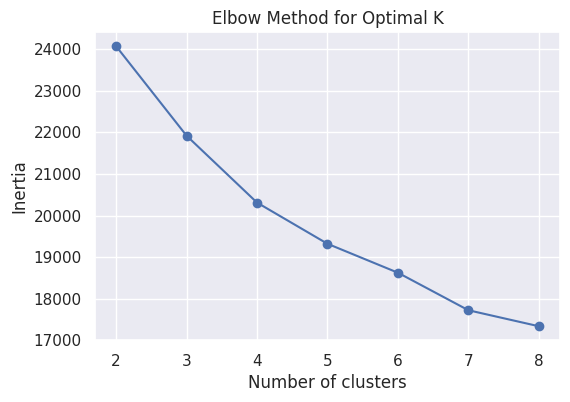

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(2, 9), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

-> Chọn k=4

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
churn_df['Cluster'] = kmeans.fit_predict(x_scaled)

In [ ]:
cluster_profile = churn_df.groupby('Cluster').mean()
cluster_profile

,customerid,churn,tenure,citytier,warehousetohome,hourspendonapp,numberofdeviceregistered,satisfactionscore,numberofaddress,complain,...,preferredpaymentmode_E wallet,preferredpaymentmode_UPI,gender_Male,preferedordercat_Grocery,preferedordercat_Laptop & Accessory,preferedordercat_Mobile,preferedordercat_Others,preferedordercat_Phone,maritalstatus_Married,maritalstatus_Single
Cluster,,,,,,,,,,,,,,,,,,,,,
0,52601.500000,1.0,13.500000,1.800000,10.500000,2.900000,4.300000,3.500000,4.700000,0.600000,...,0.400000,0.000000,0.400000,0.00000,0.000000,0.000000,1.0,0.000000,0.300000,0.400000
1,53672.086207,1.0,2.724138,1.517241,15.994253,3.244253,4.290230,3.419540,4.330460,0.554598,...,0.083333,0.080460,0.640805,0.00000,0.000000,0.000000,0.0,0.988506,0.327586,0.571839
2,51320.751092,1.0,3.703057,1.489083,14.703057,2.580786,3.414847,3.427948,3.545852,0.615721,...,0.082969,0.087336,0.611354,0.00000,0.008734,0.951965,0.0,0.021834,0.375546,0.510917
3,52767.481481,1.0,4.538462,2.356125,19.478632,2.940171,3.900285,3.330484,5.188034,0.461538,...,0.239316,0.068376,0.652422,0.05698,0.592593,0.005698,0.0,0.002849,0.393162,0.444444


In [ ]:
cluster_profile[
    ['tenure',
     'cashbackamount',
     'warehousetohome',
     'maritalstatus_Single',
     'maritalstatus_Married',
     'satisfactionscore',
     'daysincelastorder']]



,tenure,cashbackamount,warehousetohome,maritalstatus_Single,maritalstatus_Married,satisfactionscore,daysincelastorder
Cluster,,,,,,,
0,13.500000,306.900000,10.500000,0.400000,0.300000,3.500000,8.500000
1,2.724138,147.482759,15.994253,0.571839,0.327586,3.419540,2.603448
2,3.703057,126.292576,14.703057,0.510917,0.375546,3.427948,1.930131
3,4.538462,187.028490,19.478632,0.444444,0.393162,3.330484,4.378917


1. Cluster 0 = High-tenure, High-value churners


* tenure cao nhất (13.5) -> khách hàng gắn bó lâu dài

* cashbackamount cao nhất (306.9) -> từng mua hàng nhiều lần/giá trị cao

* warehousetohome thấp (10.5) → không bị bất lợi về logistics

* daysincelastorder cao (8.5) → đã lâu không quay lại

Đây là nhóm khách hàng trung thành nhưng đã mất động lực quay lại. Khả năng cao họ churn không phải vì giá cả hay giao hàng, mà do trải nghiệm dịch vụ giảm hoặc thiếu ưu đãi phù hợp ở giai đoạn sau


2. Cluster 1 = Very new users with low engagement

* tenure thấp nhất (2.7)

* cashback thấp

* warehousetohome khá cao (16)

* daysincelastorder thấp (2.6)

Đây là nhóm rời bỏ rất sớm, gần như không hình thành thói quen sử dụng. KH churn nhanh sau vài đơn đầu tiên.


3. Cluster 2 = New but quickly disengaged users


* tenure thấp (3.7)

* cashback thấp nhất (126)

* daysincelastorder thấp nhất (1.93)

* warehousetohome trung bình

Nhóm này mới nhưng mất hứng rất nhanh, thậm chí nhanh hơn cluster 1. Có thể họ thử mua một lần mà không thấy giá trị khác biệt nên rời bỏ gần như ngay lập tức


4. Cluster 3 = Logistics-sensitive churners

* warehousetohome cao nhất (19.48)

* cashback trung bình

* daysincelastorder trung bình (4.38)

* satisfactionscore thấp nhất trong 4 nhóm

Nhóm này có dấu hiệu nhạy cảm với yếu tố giao hàng và tiện lợi. Khoảng cách xa kho -> thời gian giao hàng lâu -> trải nghiệm kém -> churn.
